In [2]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles,make_blobs,make_moons
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.metrics import silhouette_score #非监督评估

### 聚类

##### K-MEANS DBSCAN 层次聚类

kmeans 0 0.38915008966401765
kmeans 1 0.4307738695171846
kmeans 2 0.8260921886020176
kmeans 3 0.3958399335729531
DBSCAN 0 0.11389974696190339
DBSCAN 1 0.3339807620706676
DBSCAN 2 0.8260921886020176
Agglomerative 0 0.3615568400286488
Agglomerative 1 0.42531962388851274
Agglomerative 2 0.8260921886020176
Agglomerative 3 0.3305655946179834


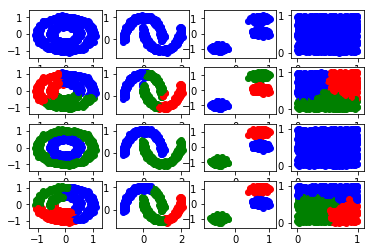

In [6]:
n_samples=1000
#下面得到的数字，前面是随机，后面是标注，可以忽略
circles=make_circles(n_samples=n_samples,factor=0.5,noise=0.05)
moons=make_moons(n_samples=n_samples,noise=0.05)
blobs=make_blobs(n_samples=n_samples,random_state=8,center_box=(-1,1),cluster_std=0.1)
random_data=np.random.rand(n_samples,2),None
colors='bgrcmyk'
data=[circles,moons,blobs,random_data]
models=[('None',None),('kmeans',KMeans(n_clusters=3)),
       ('DBSCAN',DBSCAN(min_samples=3,eps=0.2)),
       ('Agglomerative',AgglomerativeClustering(n_clusters=3,linkage='ward'))]#下标和实体
f=plt.figure()
for inx,clt in enumerate(models):
    clt_name,clt_entity=clt
    for i,dataset in enumerate(data):
        x,y=dataset
        if not clt_entity:
            clt_res=[0 for item in range(len(x))]
        else:
            clt_entity.fit(x)
            clt_res=clt_entity.labels_.astype(np.int)#聚类输出,labels聚类结果
        f.add_subplot(len(models),len(data),inx*len(data)+1+i)#图形行列
        try:
            print(clt_name,i,silhouette_score(x,clt_res))
        except:
            pass
        [plt.scatter(x[p,0],x[p,1],color=colors[clt_res[p]])for p in range(len(x))]
plt.show()